In [81]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
# Manipulação de datas
from datetime import date

In [82]:
import  warnings 
warnings.simplefilter('ignore')

In [83]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

In [84]:
df = pd.read_csv("Data/MVF.csv", sep=";")
df = df.set_index('time')
df.head(2)

,target
time,
1,150
2,117


In [85]:
#time travel
def get_lags(series, lags):
    result = []
    if lags > 0:
        for lag in range(1, lags+1):
            result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'-'+str(lag)}, axis=1))
        return pd.concat(result, axis=1, names=list(range(-1,-lags))).dropna()
    else:
        for lag in range(-1, lags-1,-1):
            result.append(series.shift(lag).rename({series.columns[0]: series.columns[0]+'+'+str(abs(lag))}, axis=1))
        return pd.concat(result, axis=1, names=list(range(+1,-lags))).dropna()

In [86]:
df.target[0:7]

time
1    150
2    117
3    149
4    113
5    110
6    140
7    126
Name: target, dtype: int64

In [87]:
sliding_windows_df = get_lags(df, 5)
sliding_windows_df.head()

,target-1,target-2,target-3,target-4,target-5
time,,,,,
6,110.0,113.0,149.0,117.0,150.0
7,140.0,110.0,113.0,149.0,117.0
8,126.0,140.0,110.0,113.0,149.0
9,161.0,126.0,140.0,110.0,113.0
10,161.0,161.0,126.0,140.0,110.0


In [88]:
# y = df.reindex(X.index)
# y 

In [89]:
X = sliding_windows_df
y = df.reindex(X.index)

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train[0:1])
X_train.head()

(47, 5)
(47, 1)
(32, 5)
(32, 1)
      target
time        
6        140


,target-1,target-2,target-3,target-4,target-5
time,,,,,
6,110.0,113.0,149.0,117.0,150.0
7,140.0,110.0,113.0,149.0,117.0
8,126.0,140.0,110.0,113.0,149.0
9,161.0,126.0,140.0,110.0,113.0
10,161.0,161.0,126.0,140.0,110.0


In [91]:
47+32+5 == len(df)

True

##### K-Nearest Neighbors (KNN)

<img src="https://camo.githubusercontent.com/b7a6b0f276eec359cab71405e9fce95efa9ab6dd625bbc8a87419ad3c75b6d08/68747470733a2f2f7363696b69742d6c6561726e2e6f72672f737461626c652f5f696d616765732f737068785f676c725f706c6f745f6e63615f696c6c757374726174696f6e5f3030312e706e67">

<img src="https://camo.githubusercontent.com/b7e942b29a188a27e74afcf4a084034942d0c3811409db191eae2dec7fa340b3/68747470733a2f2f7363696b69742d6c6561726e2e6f72672f737461626c652f5f696d616765732f737068785f676c725f706c6f745f72656772657373696f6e5f3030312e706e67">

In [92]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
model_knn.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [93]:
model_knn.predict(X_test)[:10]

array([[245.48234332],
       [246.27151948],
       [218.86681739],
       [259.55625685],
       [245.8020402 ],
       [249.41224748],
       [250.18211266],
       [238.9106322 ],
       [251.33827266],
       [242.83200355]])

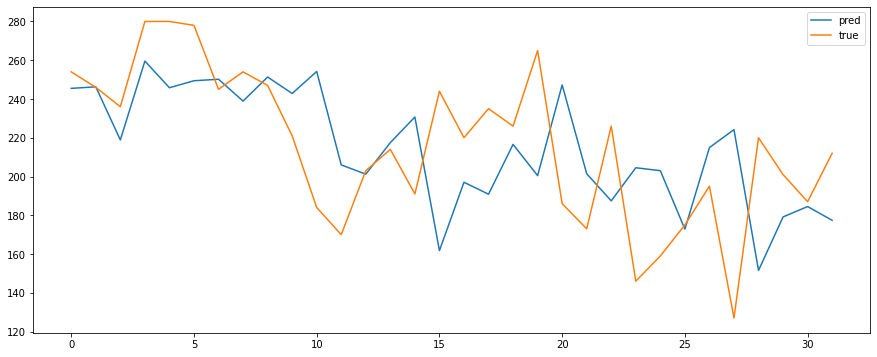

In [94]:
fig, ax = plt.subplots()
ax.plot(model_knn.predict(X_test).flatten(), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.legend()

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = {}

print('MVF - KNN model Results:\n')
print(mean_squared_error(model_knn.predict(X_test), y_test))
print(mean_absolute_error(model_knn.predict(X_test), y_test))
results['KNN'] = {'mse': mean_squared_error(model_knn.predict(X_test), y_test),
                      'mae': mean_absolute_error(model_knn.predict(X_test), y_test)}

MVF - KNN model Results:

1639.100048322172
31.484962870918395


In [96]:
# X_train_d1 = X_train.diff().dropna()
# X_test_d1 = X_test.diff().dropna()
# y_train_d1 = y_train.diff().dropna()
# y_test_d1 = y_test.diff().dropna()

# model_d1 = KNeighborsRegressor(n_neighbors=5, weights='distance')
# model_d1.fit(X_train_d1, y_train_d1)

# print('MVF_D1 - KNN model Results:\n')
# print(mean_squared_error(model_d1.predict(X_test_d1), y_test_d1))
# print(mean_absolute_error(model_d1.predict(X_test_d1), y_test_d1))
# results_MVF['KNN_D1'] = {'mse': mean_squared_error(model_d1.predict(X_test_d1), y_test_d1), 
#                         'mae': mean_absolute_error(model_d1.predict(X_test_d1), y_test_d1)}
# results_MVF

# fig, ax = plt.subplots()
# ax.plot(pd.Series(model_d1.predict(X_test_d1).flatten()), label='pred')
# ax.plot(y_test_d1.reset_index(drop=True), label='true')
# plt.legend()

p-valor: 0.01


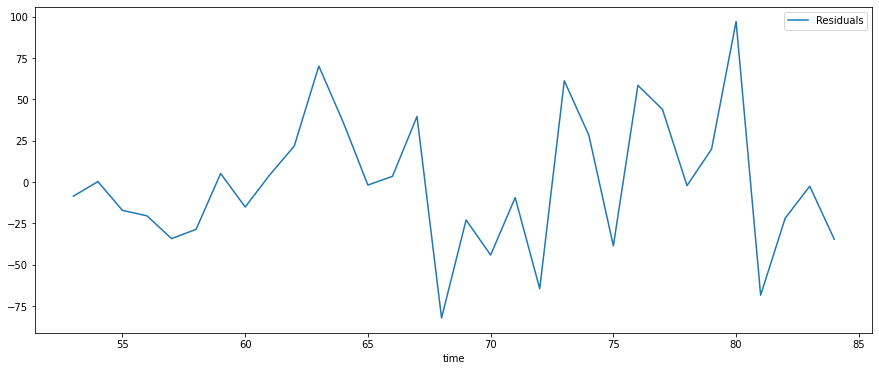

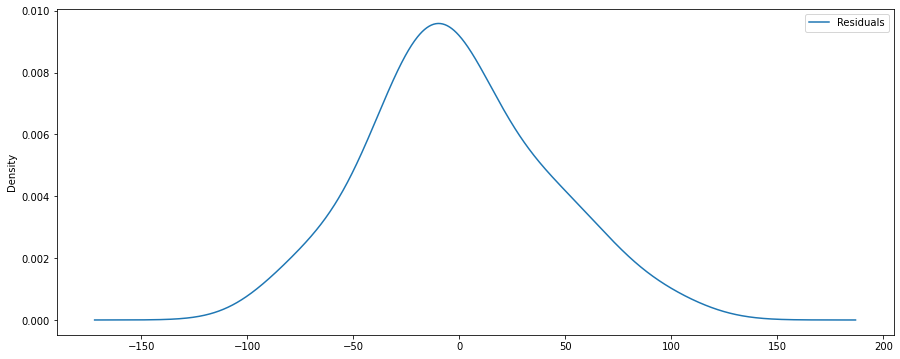

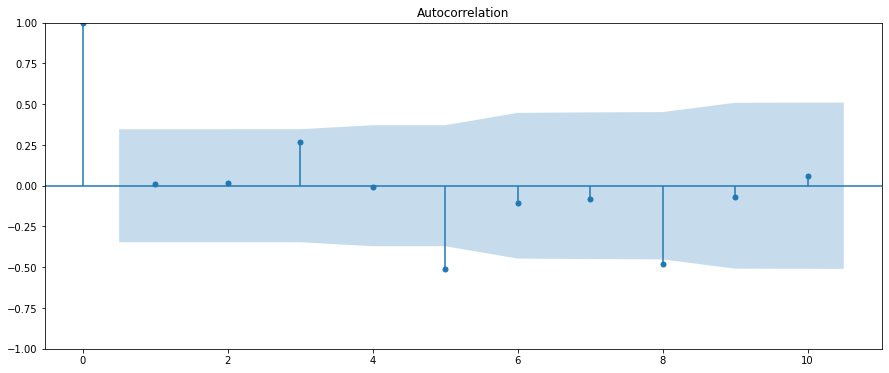

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = model_knn.predict(X_test)-y_test
residuals.rename(columns={"target": "Residuals"}, inplace=True)
residuals.plot(label="Residuals")
residuals.plot.kde()
plot_acf(residuals, lags=10);

from statsmodels.tsa.stattools import adfuller

adf = adfuller(residuals)
print(f'p-valor: {round(adf[1],2)}')

#### Support Vector Regression (SVR) 


<img src="https://camo.githubusercontent.com/8167ec71d44c5519638b44c6e9cd22409718f8371112238523f03a64dec30915/68747470733a2f2f7363696b69742d6c6561726e2e6f72672f737461626c652f5f696d616765732f737068785f676c725f706c6f745f73657061726174696e675f6879706572706c616e655f3030312e706e67">

**Artigo**: DOMINGOS, S. de O.; DE OLIVEIRA, João FL; DE MATTOS NETO, Paulo SG. ***An intelligent hybridization of ARIMA with machine learning models for time series forecasting***. Knowledge-Based Systems, v. 175, p. 72-86, 2019.


In [98]:
from sklearn.svm import SVR

In [99]:
model_svr = SVR(C=1.0, epsilon=0.2, kernel='linear')
model_svr.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='linear')

In [100]:
print('MVK - SVR model Results')
print(mean_squared_error(model_svr.predict(X_test), y_test))
print(mean_absolute_error(model_svr.predict(X_test), y_test))
results['SVR'] = {'mse': mean_squared_error(model_svr.predict(X_test), y_test),
                  'mae': mean_absolute_error(model_svr.predict(X_test), y_test)}

MVK - SVR model Results
1240.683019335803
26.765709789114084


In [101]:
results

{'KNN': {'mse': 1639.100048322172, 'mae': 31.484962870918395},
 'SVR': {'mse': 1240.683019335803, 'mae': 26.765709789114084}}

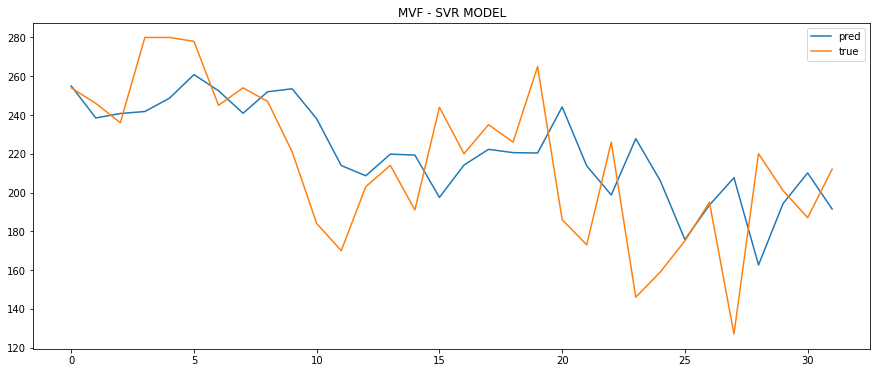

In [102]:
fig, ax = plt.subplots()
ax.plot(model_svr.predict(X_test), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('MVF - SVR MODEL')
plt.legend()

##### MLP

<img src="https://www.researchgate.net/profile/Mona-Lisa-Oliveira/publication/317905039/figure/fig3/AS:509574844694529@1498503518209/Figura-3-Ilustracao-da-rede-neural-MLP-utilizada-neste-trabalho-O-processo-de-escolha.png">

In [103]:
# !pip install tensorflow

In [104]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [105]:
# Criando o modelo
model_mlp = Sequential()
model_mlp.add(Dense(16, input_shape=(5,), activation='relu'))
model_mlp.add(Dense(16, activation='relu'))
model_mlp.add(Dense(1, activation='linear'))

# Configurando e treiando o modelo
model_mlp.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_mlp.fit(X_train, y_train, epochs=250, batch_size=1, verbose=False, validation_split=0.2)

In [106]:
pred_mlp = model_mlp.predict(X_test)

1/1 [==============================] - 0s 63ms/step


In [107]:
print('MVK - MLP model Results')
print(mean_squared_error(model_mlp.predict(X_test), y_test))
print(mean_absolute_error(model_mlp.predict(X_test), y_test))
results['MLP'] = {'mse': mean_squared_error(model_mlp.predict(X_test), y_test),
                  'mae': mean_absolute_error(model_mlp.predict(X_test), y_test)}

MVK - MLP model Results
1/1 [==============================] - 0s 25ms/step
1330.2247444307068
1/1 [==============================] - 0s 21ms/step
28.874054431915283
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step


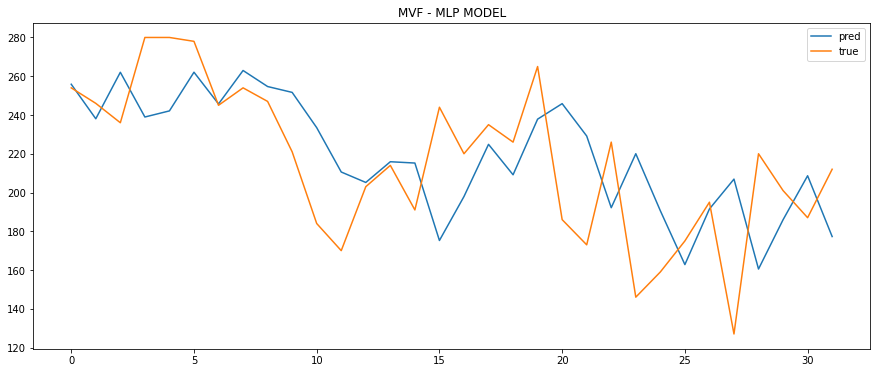

In [108]:
fig, ax = plt.subplots()
ax.plot(model_mlp.predict(X_test), label='pred')
ax.plot(y_test.reset_index(drop=True), label='true')
plt.title('MVF - MLP MODEL')
plt.legend()

In [109]:
round(pd.DataFrame(results), 2)

,KNN,SVR,MLP
mse,1639.10,1240.68,1330.22
mae,31.48,26.77,28.87


**Exercício 04:**

a) Crie modelos de Machine Learning para prever a série temporal de CO2 (disponível no statsmodels).

b) Avalie os resíduos.

c) Utilize duas métricas para avaliar a qualidade do modelo.



In [114]:
new_df = pandas
model_knn.predict(X_test)
model_svr.predict(X_test)
model_mlp.predict(X_test)

1/1 [==============================] - 0s 315ms/step


array([[255.86201],
       [238.04758],
       [262.04285],
       [238.95683],
       [242.11101],
       [262.07184],
       [245.69943],
       [262.9555 ],
       [254.68407],
       [251.6578 ],
       [233.46524],
       [210.57347],
       [205.18648],
       [215.87935],
       [215.20114],
       [175.23865],
       [197.92229],
       [224.84912],
       [209.14429],
       [237.84883],
       [245.85355],
       [229.14734],
       [192.15636],
       [220.0162 ],
       [190.58844],
       [162.80513],
       [191.50348],
       [206.90569],
       [160.51445],
       [185.94603],
       [208.63928],
       [177.27223]], dtype=float32)